In [1]:
import numpy as np
import sys
import os
import pandas as pd
import glob as glob
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def grouped_barplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.factorplot(x=x, y=y, hue=hue, data=df, size=8, kind="bar", estimator=np.mean, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax, order=['intact', 'paragraph', 'word', 'rest'])

    sns.despine(ax=ax, left=True)
    ax.set_title(title)
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    ax.set_ylim(ymin, ymax)
    l = ax.legend(loc='center right', bbox_to_anchor=(1, .65), ncol=2)
    l.set_title(hue)
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [3]:
all_data_dir = '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results/'

In [4]:
figdir = '/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/figs'
if not os.path.isdir(figdir):
    os.mkdir(figdir)

## Find accuracy by each level 

In [26]:
analysis_name = 'ind_level_analysis'

In [27]:
data_dir = os.path.join(all_data_dir, analysis_name)

In [28]:
params =glob.glob(os.path.join(data_dir, '*'))

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


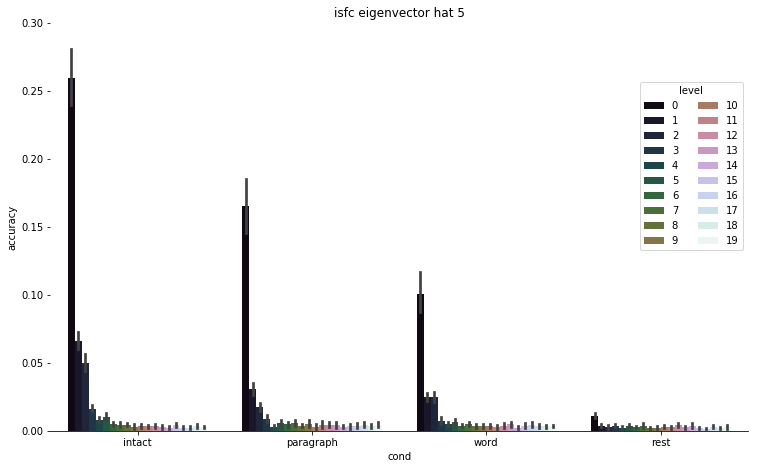

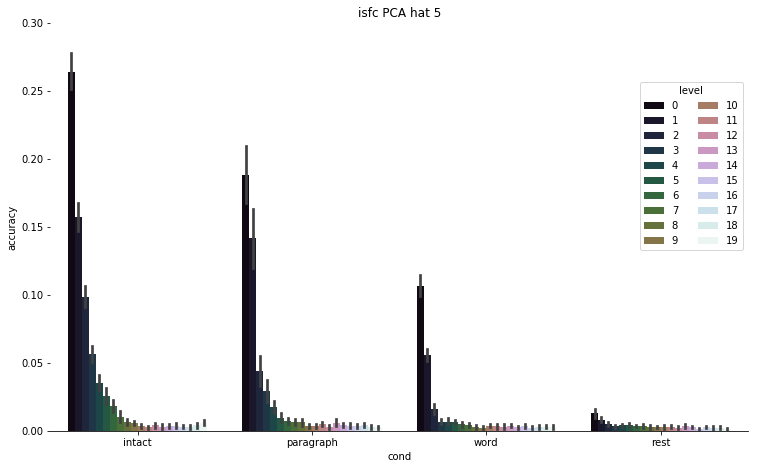

In [29]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')
    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1]

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.png')
    grouped_barplot(full_data, 'cond', 'accuracy', 'level', ymin=0, ymax=.3, title=title, outfile=outfile)
    plt.close()

## Plot proportion of peak accuracy 

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


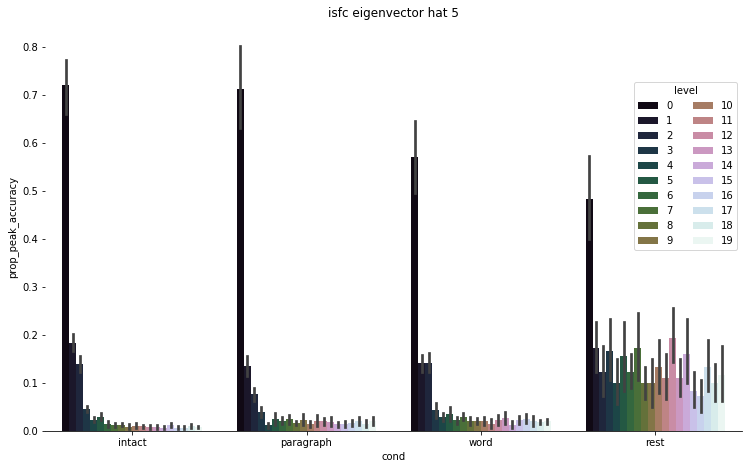

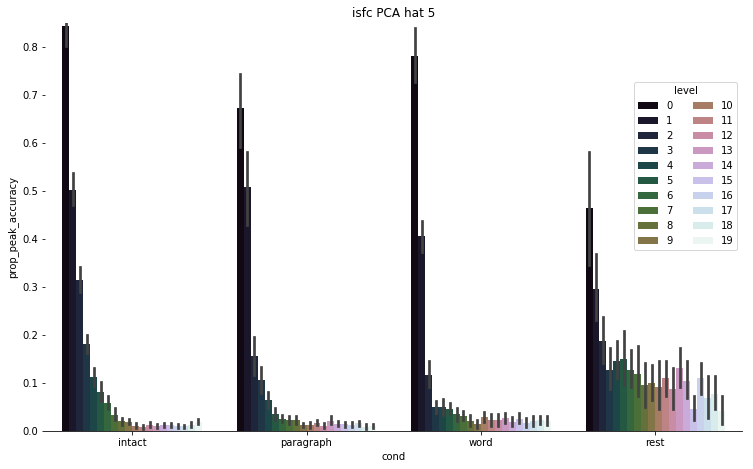

In [49]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])
        data['prop_peak_accuracy'] = data['accuracy']/data['accuracy'].max()
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)
            
    full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')
    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1]

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.png')
    grouped_barplot(full_data, 'cond', 'prop_peak_accuracy', 'level', ymin=0, ymax=.85, title=title, outfile=outfile)
    plt.close()

## Find optimimal level

In [9]:
analysis_name = 'optimize_levels'

In [10]:
data_dir = os.path.join(all_data_dir, analysis_name)

In [11]:
params =glob.glob(os.path.join(data_dir, '*'))

/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


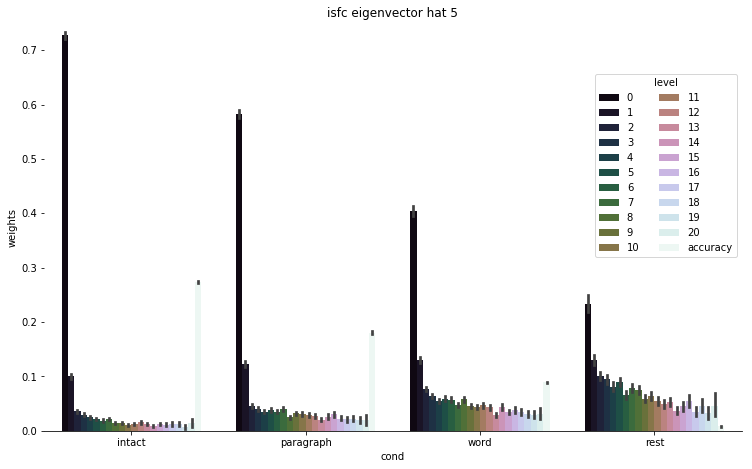

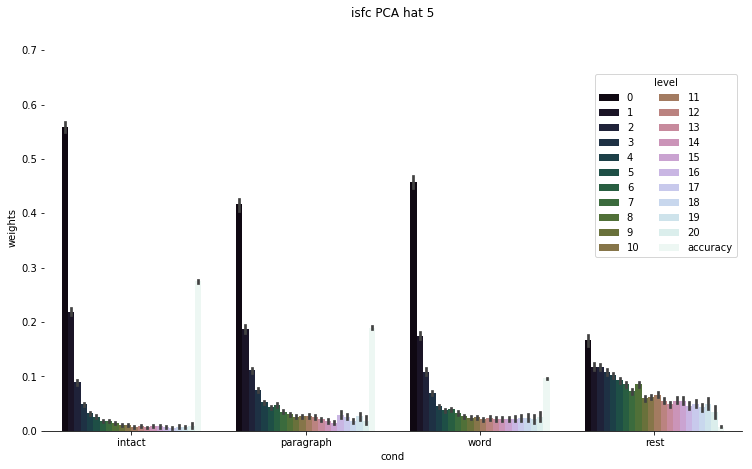

In [15]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

        melted_df = pd.DataFrame()
        for c in np.arange(full_data['level'].max() + 2):
            if c!=full_data['level'].max() + 1:
                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['level_' + str(c)]
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = c
                melted_temp_df['cond'] = full_data['cond']

                if melted_df.empty:
                    melted_df = melted_temp_df
                else:
                    melted_df = melted_df.append(melted_temp_df)
            else:

                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data['accuracy']
                melted_temp_df['level'] = full_data['level']
                melted_temp_df['level'] = 'accuracy'
                melted_temp_df['cond'] = full_data['cond']
                melted_df = melted_df.append(melted_temp_df)
                full_data['error'] = 1-full_data['error']

    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

    outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '.png')
    grouped_barplot(melted_df, 'cond', 'weights', 'level', ymin=0, ymax=.75, title=title, outfile=outfile)
    plt.close()

## Optimize weights time-chunked

In [16]:
analysis_name = 'level_analysis_chunked'

In [17]:
data_dir = os.path.join(all_data_dir, analysis_name)

In [18]:
params =glob.glob(os.path.join(data_dir, '*'))

/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


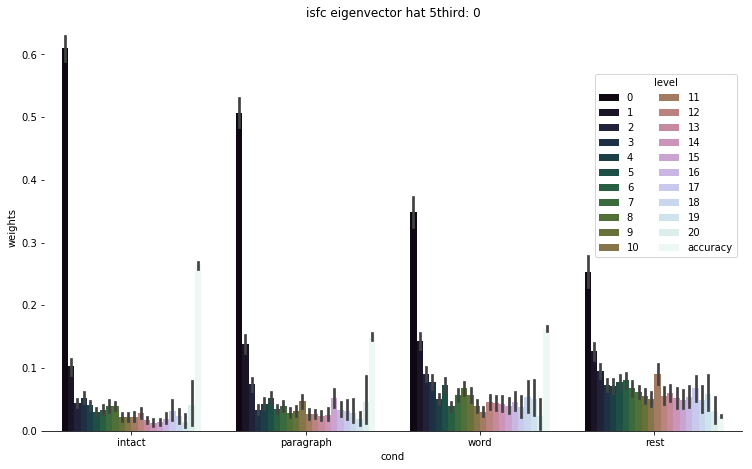

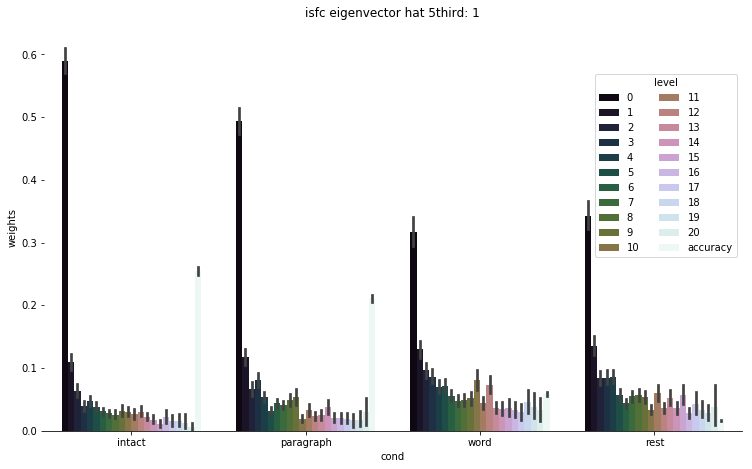

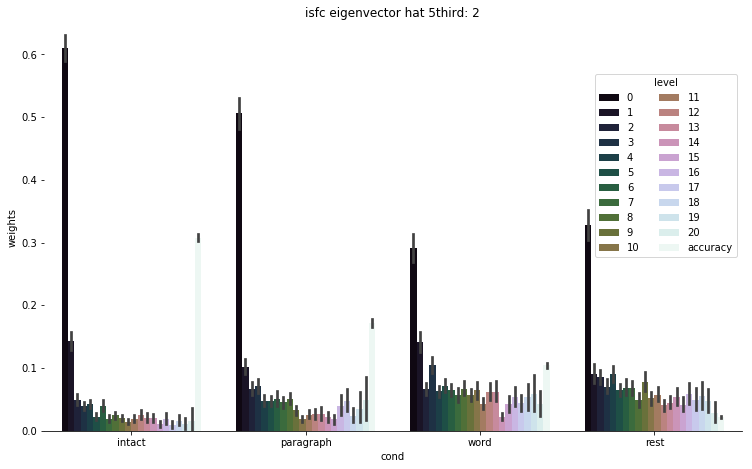

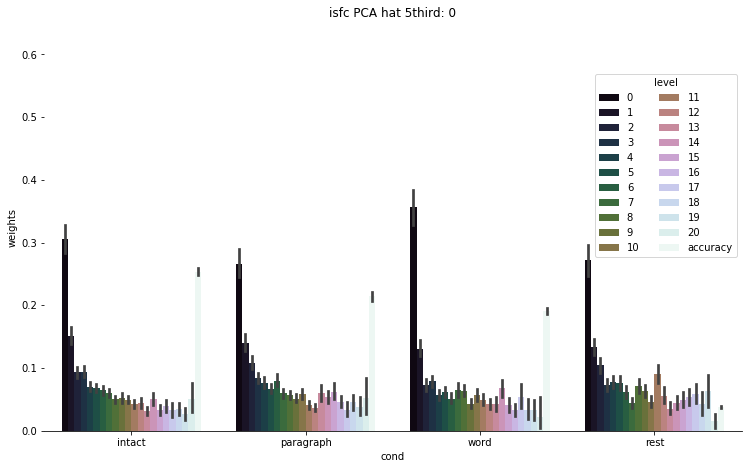

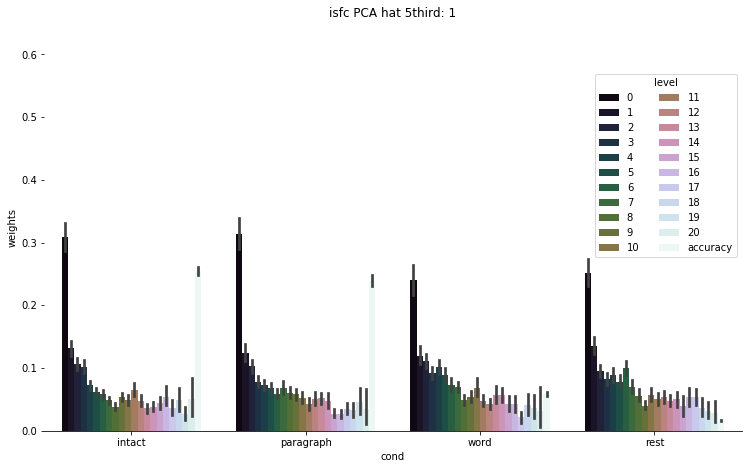

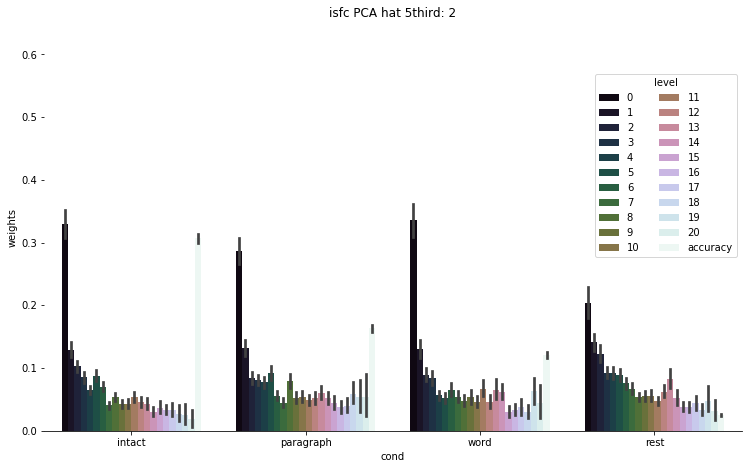

In [23]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['cond'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    for t in range(3):
        melted_df = pd.DataFrame()
        full_data_third = full_data[full_data['third'] == t]

        for c in np.arange(full_data_third['level'].max() + 2):
            if c!=full_data_third['level'].max() + 1:
                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data_third['level_' + str(c)]
                melted_temp_df['level'] = full_data_third['level']
                melted_temp_df['level'] = c
                melted_temp_df['cond'] = full_data_third['cond']

                if melted_df.empty:
                    melted_df = melted_temp_df
                else:
                    melted_df = melted_df.append(melted_temp_df)
            else:

                melted_temp_df = pd.DataFrame()
                melted_temp_df['weights'] = full_data_third['accuracy']
                melted_temp_df['level'] = full_data_third['level']
                melted_temp_df['level'] = 'accuracy'
                melted_temp_df['cond'] = full_data_third['cond']
                melted_df = melted_df.append(melted_temp_df)
                full_data_third['error'] = 1-full_data_third['error']

        p_split = param_name.split('_')

        title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] + 'third: ' + str(t)


        outfile = os.path.join(figdir, param_name + '_'+ str(t) + '_accuracy.png')
        grouped_barplot(melted_df, 'cond', 'weights', 'level', ymin=0, ymax=.65, title=title, outfile=outfile)
        plt.close()